In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Лидия Григорьевна'],
  ['Лидия Григорьевна', 'Елена Григорьевна', 'Холмин'],
  ['Лидия Григорьевна', 'Холмин', 'Алексей'],
  ['Холмин', 'Алексей'],
  ['Холмин'],
  ['Холмин', 'Диковский', 'Лидия Григорьевна'],
  ['Холмин', 'Елена Григорьевна'],
  ['Холмин'],
  ['Холмин', 'Елена Григорьевна']],
 [['Лакей', 'Холмин'],
  ['Холмин'],
  ['Холмин', 'Диковский'],
  ['Холмин', 'Диковский', 'Лакей', 'Алексей'],
  ['Холмин', 'Диковский'],
  ['Диковский', 'Лидия Григорьевна'],
  ['Холмин'],
  ['Холмин', 'Алексей'],
  ['Елена Григорьевна', 'Холмин'],
  ['Елена Григорьевна', 'Холмин', 'Лидия Григорьевна', 'Диковский']],
 [['Холмин', 'Елена Григорьевна'],
  ['Холмин'],
  ['Холмин', 'Елена Григорьевна'],
  ['Холмин', 'Акулина'],
  ['Холмин', 'Акулина', 'Диковский'],
  ['Холмин', 'Диковский'],
  ['Холмин', 'Диковский', 'Елена Григорьевна'],
  ['Холмин', 'Диковский'],
  ['Холмин', 'Диковский', 'Акулина'],
  ['Холмин', 'Диковский'],
  ['Диковский'],
  ['Холмин', 'Диковский'],
  ['Холмин', 'Диковский', 'Елена Григорьевна'],
  ['Холмин', 'Елена Григорьевна'],
  ['Холмин', 'Елена Григорьевна', 'Акулина'],
  ['Холмин', 'Елена Григорьевна']],
 [['Елена Григорьевна', 'Кормилица'],
  ['Холмин', 'Елена Григорьевна'],
  ['Холмин', 'Елена Григорьевна', 'Лидия Григорьевна'],
  ['Лидия Григорьевна', 'Холмин', 'Елена Григорьевна'],
  ['Лидия Григорьевна', 'Елена Григорьевна'],
  ['Лидия Григорьевна', 'Елена Григорьевна', 'Холмин']],
 [['Лидия Григорьевна',
   'Диковский',
   'Старенький князь',
   'Фельетонист',
   'Юноша'],
  ['Лидия Григорьевна', 'Диковский'],
  ['Лидия Григорьевна', 'Диковский', 'Алексей', 'Елена Григорьевна'],
  ['Фельетонист'],
  ['Лидия Григорьевна'],
  ['Алексей', 'Холмин'],
  ['Холмин'],
  ['Холмин', 'Лидия Григорьевна'],
  ['Холмин'],
  ['Холмин', 'Диковский'],
  ['Холмин'],
  ['Холмин', 'Лидия Григорьевна', 'Диковский'],
  ['Холмин', 'Лидия Григорьевна'],
  ['Холмин',
   'Лидия Григорьевна',
   'Диковский',
   'Старенький князь',
   'Юноша',
   'Фельетонист',
   'Алексей',
   'Елена Григорьевна']]]

## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,III.11,III.12,III.13,III.14,III.15,III.16,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12,V.13,V.14
Акулина,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Алексей,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
Диковский,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1
Елена Григорьевна,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Кормилица,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Лакей,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Лидия Григорьевна,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,1,1
Старенький князь,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Фельетонист,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
Холмин,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,5,пьеса
Акулина,,,0.33,,,0.09
Алексей,0.12,0.33,,,0.31,0.19
Диковский,0.12,0.22,0.07,,0.38,0.26
Елена Григорьевна,0.5,0,0.33,,0.15,0.30
Кормилица,,,,0,,0.02
Лакей,,0.22,,,,0.06
Лидия Григорьевна,0.25,0.22,,0,0.38,0.24
Старенький князь,,,,,0.08,0.04
Фельетонист,,,,,0.23,0.07
Холмин,0,0.11,0.07,0.4,0,0.19


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.21


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,действия
1,0.09,0.27,0.27,0.18,0.09,0.27,0.18,0.09,0.18,,,,,,,,0.18
2,0.18,0.09,0.18,0.36,0.18,0.18,0.09,0.18,0.18,0.36,,,,,,,0.20
3,0.18,0.09,0.18,0.18,0.27,0.18,0.27,0.18,0.27,0.18,0.09,0.18,0.27,0.18,0.27,0.18,0.20
4,0.18,0.18,0.27,0.27,0.18,0.27,,,,,,,,,,,0.23
5,0.45,0.18,0.36,0.09,0.09,0.18,0.09,0.18,0.09,0.18,0.09,0.27,0.18,0.73,,,0.23


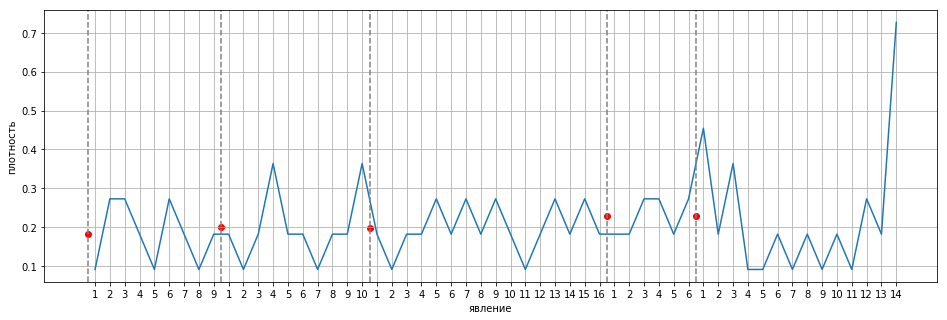

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

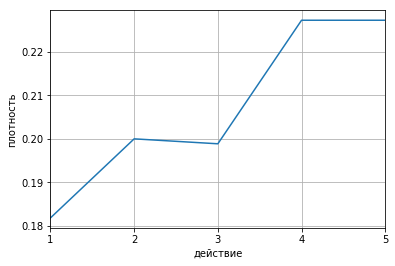

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1    2     3     4     5  пьеса
Акулина           Алексей                                          0.20
                  Диковский                     0.56               0.38
                  Елена Григорьевна             0.56               0.40
                  Кормилица                                        0.09
                  Лакей                                            0.11
                  Лидия Григорьевна                                0.40
                  Старенький князь                                 0.11
                  Фельетонист                                      0.13
                  Холмин                        0.69               0.75
                  Юноша                                            0.11
Алексей           Акулина                                          0.20
                  Диковский          0.33  0.5              0.36   0.40
                  Елена Григорьевна  0.56  0.4              0.07   0.42
                  Кормилица                                        0.15
                  Лакей                    0.2                     0.13
                  Лидия Григорьевна  0.44  0.4               0.5   0.35
                  Старенький князь                          0.21   0.13
                  Фельетонист                               0.29   0.15
                  Холмин             0.67  0.7              0.57   0.73
                  Юноша                                     0.21   0.13
Диковский         Акулина                       0.56               0.38
                  Алексей            0.33  0.5              0.36   0.40
                  Елена Григорьевна  0.44  0.5  0.75        0.29   0.56
                  Кормилица                                        0.40
                  Лакей                    0.5                     0.38
                  Лидия Григорьевна  0.33  0.3              0.29   0.42
                  Старенький князь                          0.29   0.35
                  Фельетонист                               0.36   0.36
                  Холмин             0.78  0.6   0.5        0.64   0.62
                  Юноша                                     0.29   0.35
Елена Григорьевна Акулина                       0.56               0.40
                  Алексей            0.56  0.4              0.07   0.42
                  Диковский          0.44  0.5  0.75        0.29   0.56
                  Кормилица                           0.83         0.35
                  Лакей                    0.4                     0.40
                  Лидия Григорьевна  0.56  0.2        0.33  0.43   0.40
                  Старенький князь                          0.14   0.36
                  Фельетонист                               0.21   0.38
                  Холмин             0.56  0.7   0.5  0.33  0.64   0.56
                  Юноша                                     0.14   0.36
Кормилица         Акулина                                          0.09
                  Алексей                                          0.15
                  Диковский                                        0.40
                  Елена Григорьевна                   0.83         0.35
                  Лакей                                            0.05
                  Лидия Григорьевна                   0.83         0.35
                  Старенький князь                                 0.05
                  Фельетонист                                      0.07
                  Холмин                              0.83         0.84
                  Юноша                                            0.05
Лакей             Акулина                                          0.11
                  Алексей                  0.2                     0.13
                  Диковский                0.5                     0.38
                  Елена Григорьевна        0.4                     0.40
                  Кормилица                                        0.05
        

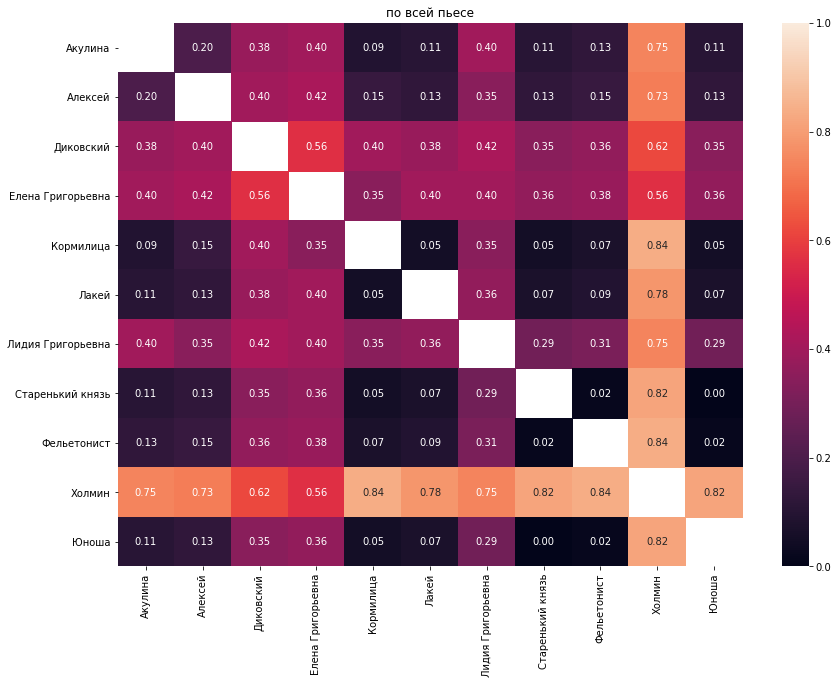

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

Старенький князь = Юноша


## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

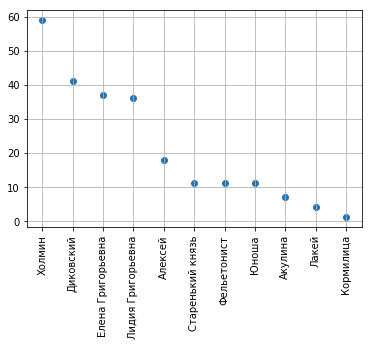

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Холмин,Диковский,Елена Григорьевна,Лидия Григорьевна,Алексей,Старенький князь,Фельетонист,Юноша,Акулина,Лакей,Кормилица
ранг,59,41,37,36,18,11,11,11,7,4,1


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,5,пьеса
Холмин,0.89,0.9,0.94,0.67,0.64,0.82
Диковский,0.11,0.5,0.56,,0.43,0.38
Елена Григорьевна,0.33,0.2,0.44,1,0.14,0.36
Лидия Григорьевна,0.44,0.2,,0.67,0.57,0.33
Алексей,0.22,0.2,,,0.21,0.13
Акулина,,,0.25,,,0.07
Фельетонист,,,,,0.21,0.05
Лакей,,0.2,,,,0.04
Старенький князь,,,,,0.14,0.04
Юноша,,,,,0.14,0.04


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,Акулина,Алексей,Диковский,Елена Григорьевна,Кормилица,Лакей,Лидия Григорьевна,Старенький князь,Фельетонист,Холмин,Юноша
Акулина,,0,0,0,,,0,,,0,
Алексей,,,0,0,,,0.25,,,0.25,
Диковский,,0,,0,,,0.25,,,0.12,
Елена Григорьевна,,0,0,,,,0.25,,,0.38,
Кормилица,,0,0,0,,,0,,,0,
Лакей,,0,0,0,,,0,,,0,
Лидия Григорьевна,,0.5,1,0.33,,,,,,0.38,
Старенький князь,,0,0,0,,,0,,,0,
Фельетонист,,0,0,0,,,0,,,0,
Холмин,,1,1,1,,,0.75,,,,


Действие 2


,Акулина,Алексей,Диковский,Елена Григорьевна,Кормилица,Лакей,Лидия Григорьевна,Старенький князь,Фельетонист,Холмин,Юноша
Акулина,,0,0,0,,0,0,,,0,
Алексей,,,0.2,0,,0.5,0,,,0.22,
Диковский,,0.5,,0.5,,0.5,1,,,0.44,
Елена Григорьевна,,0,0.2,,,0,0.5,,,0.22,
Кормилица,,0,0,0,,0,0,,,0,
Лакей,,0.5,0.2,0,,,0,,,0.22,
Лидия Григорьевна,,0,0.4,0.5,,0,,,,0.11,
Старенький князь,,0,0,0,,0,0,,,0,
Фельетонист,,0,0,0,,0,0,,,0,
Холмин,,1,0.8,1,,1,0.5,,,,


Действие 3


,Акулина,Алексей,Диковский,Елена Григорьевна,Кормилица,Лакей,Лидия Григорьевна,Старенький князь,Фельетонист,Холмин,Юноша
Акулина,,,0.22,0.14,,,,,,0.27,
Алексей,0,,0,0,,,,,,0,
Диковский,0.5,,,0.29,,,,,,0.53,
Елена Григорьевна,0.25,,0.22,,,,,,,0.47,
Кормилица,0,,0,0,,,,,,0,
Лакей,0,,0,0,,,,,,0,
Лидия Григорьевна,0,,0,0,,,,,,0,
Старенький князь,0,,0,0,,,,,,0,
Фельетонист,0,,0,0,,,,,,0,
Холмин,1,,0.89,1,,,,,,,


Действие 4


,Акулина,Алексей,Диковский,Елена Григорьевна,Кормилица,Лакей,Лидия Григорьевна,Старенький князь,Фельетонист,Холмин,Юноша
Акулина,,,,0,0,,0,,,0,
Алексей,,,,0,0,,0,,,0,
Диковский,,,,0,0,,0,,,0,
Елена Григорьевна,,,,,1,,1,,,1,
Кормилица,,,,0.17,,,0,,,0,
Лакей,,,,0,0,,0,,,0,
Лидия Григорьевна,,,,0.67,0,,,,,0.75,
Старенький князь,,,,0,0,,0,,,0,
Фельетонист,,,,0,0,,0,,,0,
Холмин,,,,0.67,0,,0.75,,,,


Действие 5


,Акулина,Алексей,Диковский,Елена Григорьевна,Кормилица,Лакей,Лидия Григорьевна,Старенький князь,Фельетонист,Холмин,Юноша
Акулина,,0,0,0,,,0,0,0,0,0
Алексей,,,0.33,1,,,0.25,0.5,0.33,0.22,0.5
Диковский,,0.67,,1,,,0.62,1,0.67,0.33,1
Елена Григорьевна,,0.67,0.33,,,,0.25,0.5,0.33,0.11,0.5
Кормилица,,0,0,0,,,0,0,0,0,0
Лакей,,0,0,0,,,0,0,0,0,0
Лидия Григорьевна,,0.67,0.83,1,,,,1,0.67,0.44,1
Старенький князь,,0.33,0.33,0.5,,,0.25,,0.67,0.11,1
Фельетонист,,0.33,0.33,0.5,,,0.25,1,,0.11,1
Холмин,,0.67,0.5,0.5,,,0.5,0.5,0.33,,0.5


По всей пьесе


,Акулина,Алексей,Диковский,Елена Григорьевна,Кормилица,Лакей,Лидия Григорьевна,Старенький князь,Фельетонист,Холмин,Юноша
Акулина,,0,0.1,0.05,0,0,0,0,0,0.09,0
Алексей,0,,0.14,0.1,0,0.5,0.17,0.5,0.33,0.13,0.5
Диковский,0.5,0.43,,0.25,0,0.5,0.44,1,0.67,0.36,1
Елена Григорьевна,0.25,0.29,0.24,,1,0,0.44,0.5,0.33,0.38,0.5
Кормилица,0,0,0,0.05,,0,0,0,0,0,0
Лакей,0,0.14,0.05,0,0,,0,0,0,0.04,0
Лидия Григорьевна,0,0.43,0.38,0.4,0,0,,1,0.67,0.24,1
Старенький князь,0,0.14,0.1,0.05,0,0,0.11,,0.67,0.02,1
Фельетонист,0,0.14,0.1,0.05,0,0,0.11,1,,0.02,1
Холмин,1,0.86,0.76,0.85,0,1,0.61,0.5,0.33,,0.5


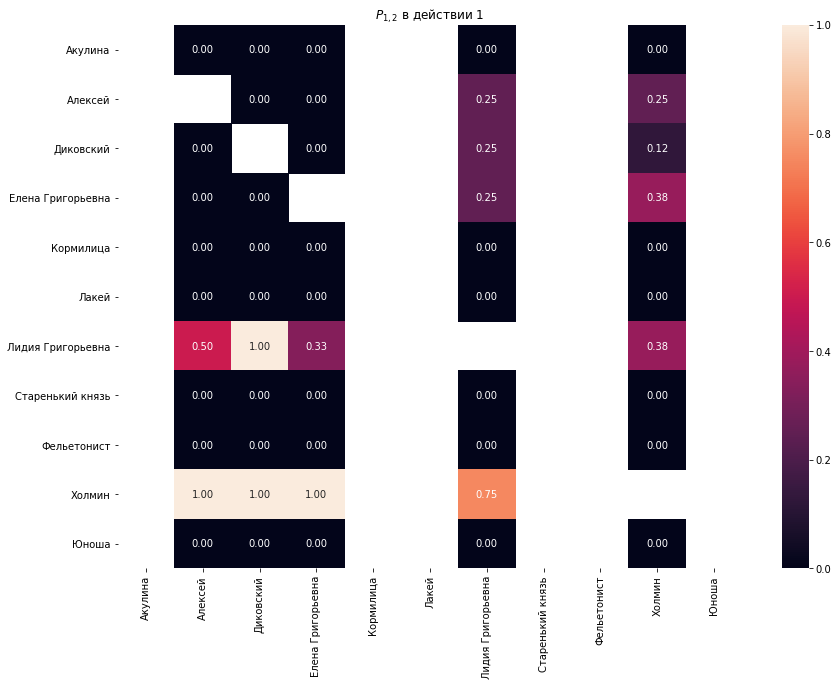

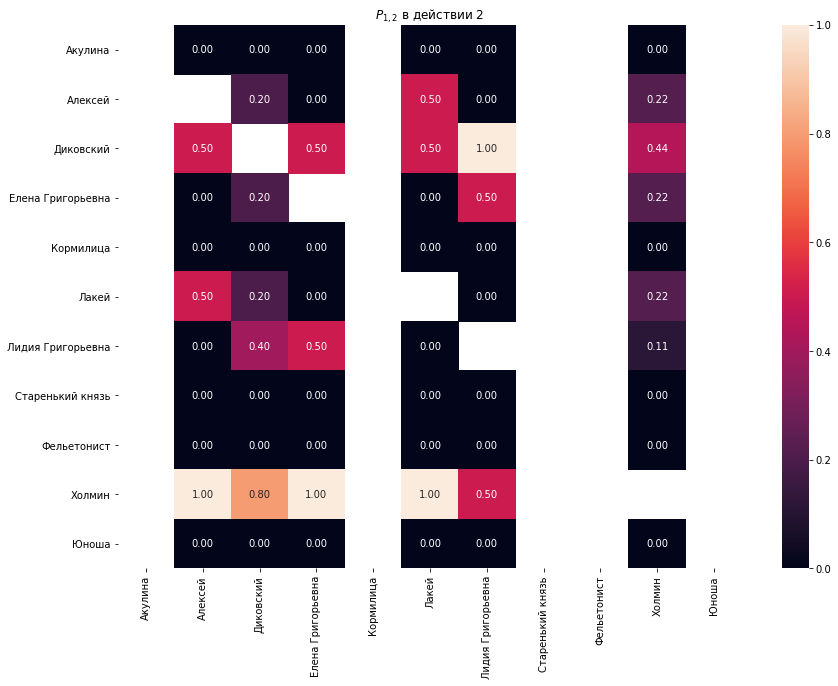

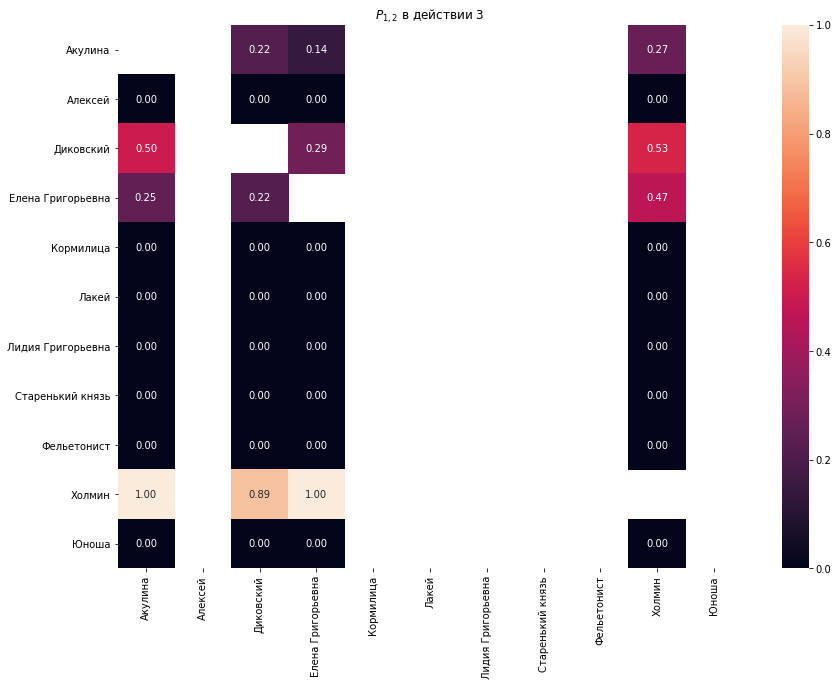

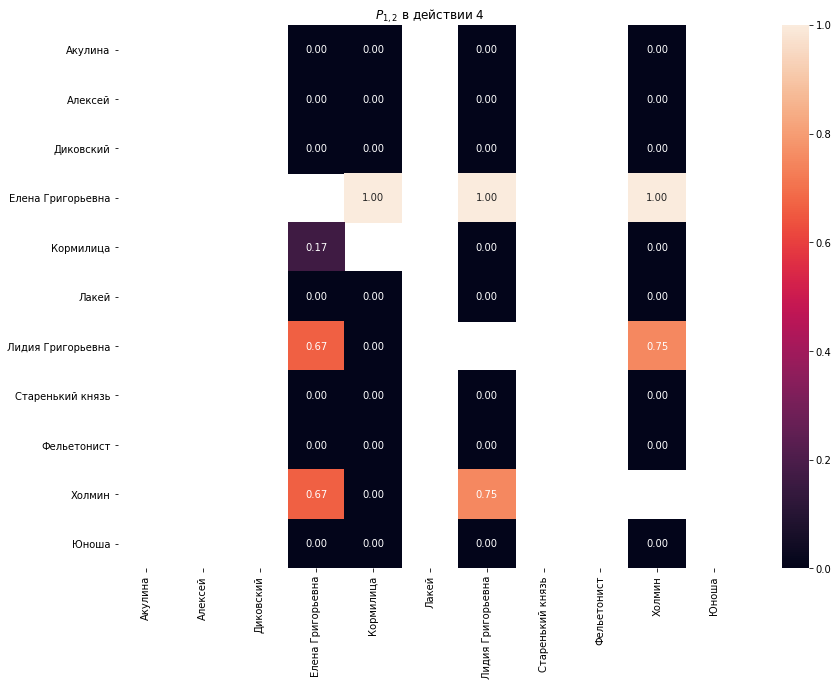

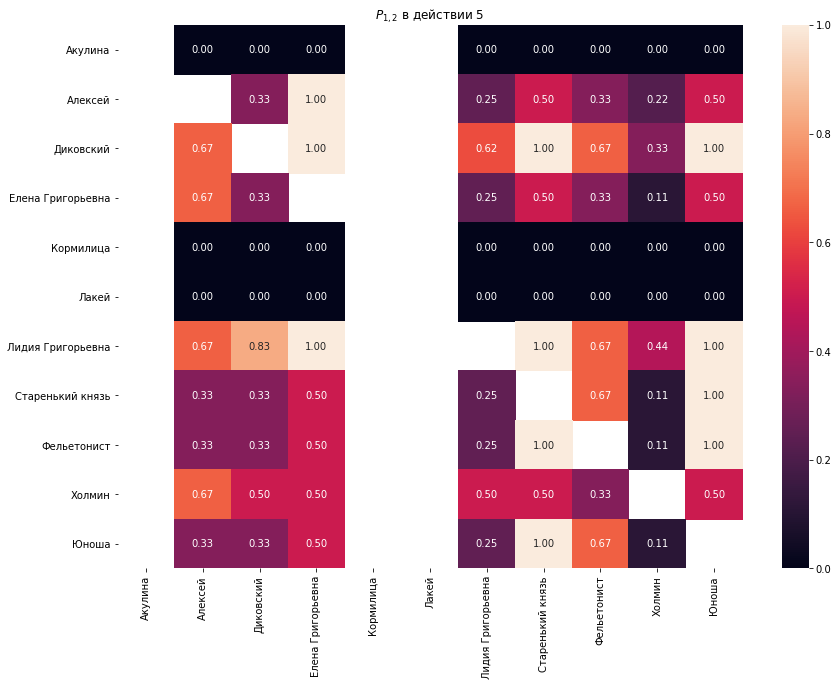

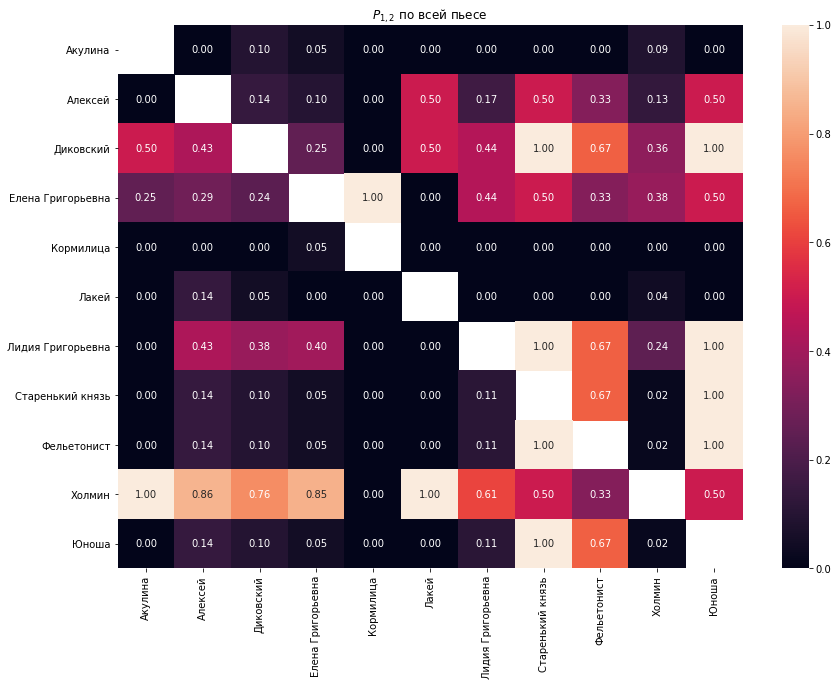

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

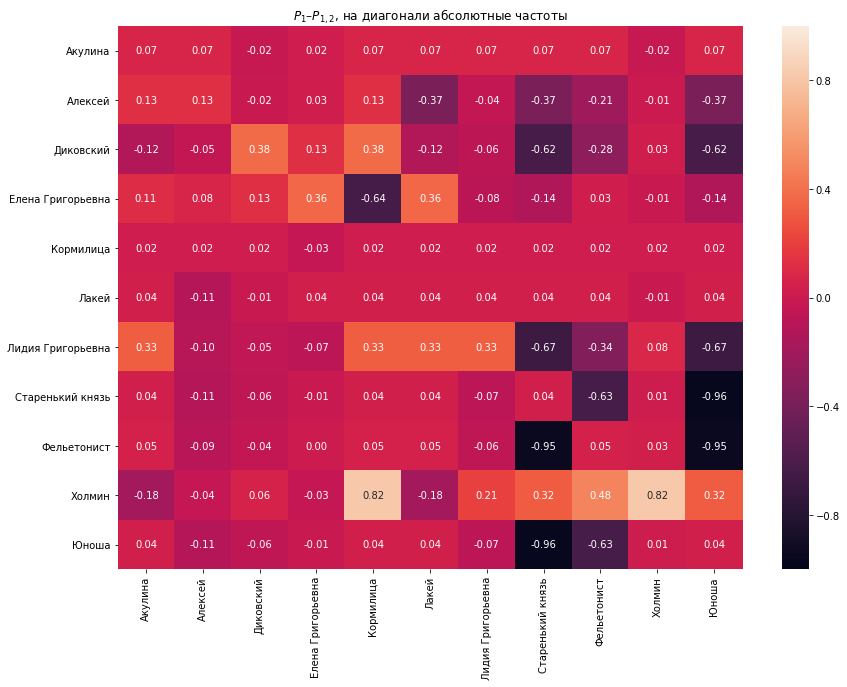

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");